In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [2]:
y=y.reshape(len(y),-1)

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
sc_y = StandardScaler()
y= sc.fit_transform(y)

In [4]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

C:\Users\JATIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [5]:
sc.inverse_transform(regressor.predict(sc.transform([[6.5]])))

array([87714.85539438])

In [6]:
y_pred = regressor.predict(X)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y.reshape(len(y),1)),1))

[[-0.6197853  -0.72004253]
 [-0.62924694 -0.70243757]
 [-0.56788994 -0.66722767]
 [-0.49732233 -0.59680786]
 [-0.44690338 -0.49117815]
 [-0.36617206 -0.35033854]
 [-0.14115569 -0.17428902]
 [ 0.28557658  0.17781001]
 [ 0.78226531  0.88200808]
 [ 1.08559794  2.64250325]]


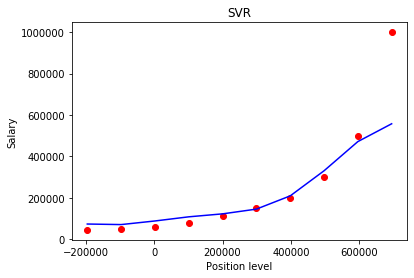

In [7]:
plt.scatter(sc.inverse_transform(X), sc.inverse_transform(y), color = 'red')
plt.plot(sc.inverse_transform(X), sc.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [8]:
from sklearn import metrics

print('Mean Absolute Error (MAE) is: ',metrics.mean_absolute_error(dataset.iloc[:, -1].values,regressor.predict(X)))
print('Mean Squared Error (MSE) is: ',metrics.mean_squared_error(y,regressor.predict(X)))
print('Root Mean Squared Error (RMSE) is: ',np.sqrt(metrics.mean_squared_error(y,regressor.predict(X))))

Mean Absolute Error (MAE) is:  249500.11150357974
Mean Squared Error (MSE) is:  0.24839989293792014
Root Mean Squared Error (RMSE) is:  0.4983973243687411


In [9]:
from sklearn.metrics import r2_score
r2_score(y, regressor.predict(X))

0.7516001070620798